# 1.2 Motion Model

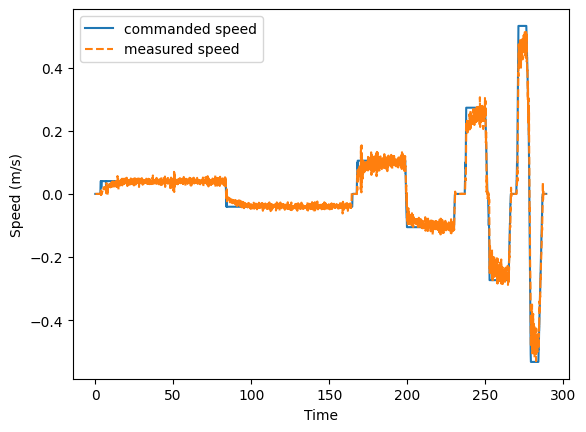

In [4]:
from numpy import loadtxt, gradient
matplotlib.style.use('default')
from matplotlib.pyplot import subplots, show

# Load data
filename = 'partA/training1.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, distance, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, \
    sonar1, sonar2 = data.T

v_com = velocity_command

dt = time[1:] - time[0:-1]
v_est = gradient(distance, time)

fig, axes = subplots(1)
axes.plot(time, v_com, label='commanded speed')
axes.plot(time, v_est,'--', label='measured speed')
axes.set_xlabel('Time')
axes.set_ylabel('Speed (m/s)')
axes.legend()

show()


In [5]:
# fig,ax = subplots(1)
# ax.plot(distance,raw_ir1,'.',alpha=0.2)
# # ax.plot(x,)

g = lambda u_prev, dt :  u_prev * dt

# W_n = lambda x_now, u_prev, dt : x_now - g( u_prev, dt)

# X_now = lambda x_now, x_prev, u_prev, dt : W_n(x_now, x_prev,u_prev) + g(x_prev, u_prev, dt)


# print(g(2,3,3))



In [6]:
# *********************************     TRAINING 1      ************************************
# Load data
filename = 'partA/training1.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, distance, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, \
    sonar1, sonar2 = data.T

# # *********************************     TEST       ************************************
# # Load data
# filename = 'partA/training1.csv'
# data = loadtxt(filename, delimiter=',', skiprows=1)

# # Split into columns
# index, time, distance, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, \
#     sonar1, sonar2 = data.T



# # *********************************     TRAINING 2      ************************************
# # Load data
# filename = 'partA/training1.csv'
# data = loadtxt(filename, delimiter=',', skiprows=1)

# # Split into columns
# index, time, distance, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, \
#     sonar1, sonar2 = data.T





In [7]:
# import data
import numpy as np
train1 = np.loadtxt('partA/training2.csv', delimiter=',', skiprows=1, usecols = (1,2,3))
# train1 = np.loadtxt('partA/test.csv', delimiter=',', skiprows=1, usecols = (1,2,3))

time_t1, range_t1, velocity_command_t1= train1.T

# rename the data variable
v_com = velocity_command_t1
z = range_t1 
t = time_t1

# Plot graph
# fig,ax = subplots(1)
# ax.plot(t,z,'.',alpha=0.2)
# ax.plot(t,v_com,'.',alpha=0.2)
    

0.0
0.0
0.0
0.0
0.33700016472568045
0.0
0.33335616823085684
0.33540613204919295
0.0
0.332596183781409
0.0
0.3135008545261193
-0.3290230816107708
0.0
0.33636639961360815
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.3355537146333104
0.0
-0.33097292270802836
0.0
-0.3357672711087507
0.0
-0.3365809921068019
-0.30563171965059144
0.0
0.0
0.0
0.0
0.0
0.33342241824644525
0.0
0.33088415090726003
0.0
0.3306115954148522
0.33174124077062744
0.0
0.30657251718936457
0.0
-0.33627605708588815
0.32982644812651873
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.16509912872977628
0.0
0.0
0.17795873006589177
0.0
0.0
0.19991371848730533
0.0
0.21578372320310427
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.3307471606472611
0.0
-0.33786613983424385
-0.3304644175082158
0.0
-0.33209452114112625
0.0
-0.33550808556033773
-0.3312029147446227
0.0
-0.33820941115036
0.0
0.3372114902792032
0

Text(0, 0.5, 'position (m)')

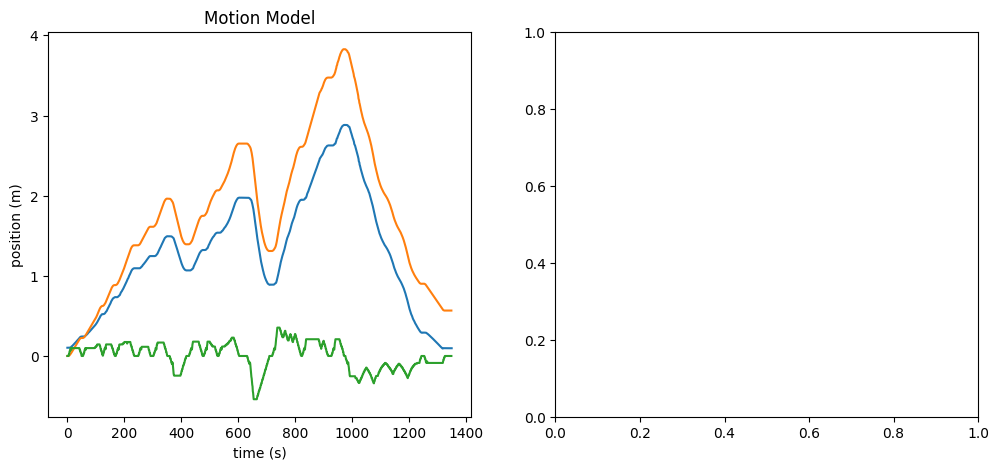

In [30]:
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt

# Initial position
x_est = np.array([0])
x_est2 = np.array([0])

x_now = 0
x_now2 = 0
# process noise W
w_List = np.array([0])
# acc_list = np.array([0])
acc = 0

for i in range(2,len(t)):
    dt = t[i] - t[i-1]
    acc = (v_com[i-1] - v_com[i-2])/dt 
    
    x_now = x_now +  v_com[i-1]*dt + acc * dt **2  / 2 
    # x_now2 = x_now2 +  v_com[i-1]*dt
    x_now2 = x_now2 + acc * dt ** 2 / dt
    print(acc)
    
    # w_now = z[i] - z[i-1] - g(x_est[i-1],v_com[i-1],dt) -x_now
    # w_now = z[i]- z[i-1] - g(v_com[i-1],dt)
    # w_List = np.append(w_List,w_now)
    x_est = np.append(x_est,x_now)
    x_est2 = np.append(x_est2,x_now2)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Specify figsize
# ax[0].figure()
# ax.subplot()

# all_w = np.cumsum((w_List),dtype=float)

# x_est += all_w

# plt.subplot(122)
# ax[1].plot(t, w_List) 
# ax[1].plot(t, x_est)



# *********************** plot Motion Model & Process Noise ******************************************
# plot motion model
ax[0].plot(z)
ax[0].plot(x_est )
ax[0].plot(x_est2)

ax[0].set_title("Motion Model")
ax[0].set_xlabel(r"time (s)")
ax[0].set_ylabel(r"position (m)")

# plot process noise
# ax[1].plot(t, w_List) 
# ax[1].set_title("Process Noise")
# ax[1].set_xlabel(r"time (s)")
# ax[1].set_ylabel(r"position (m)")
# ax[1].grid()

# plt.tight_layout()  # Adjust layout
# plt.show()  # Display the plots



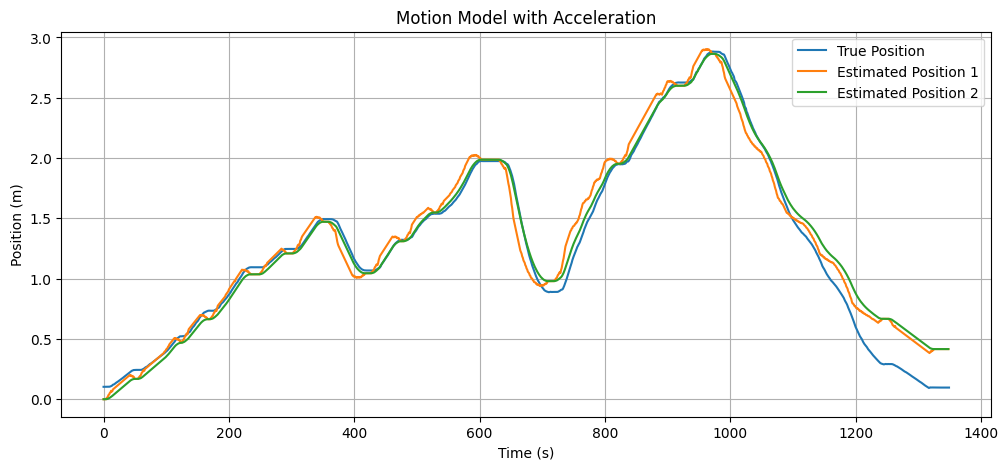

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
x_est = np.array([0])
x_est2 = np.array([0])
x_now = 0
x_now2 = 0

# Create an array for process noise (if needed)
# w_List = np.array([0])

# Assuming you have arrays t, v_com, and z initialized with appropriate data
dt = 0.045
for i in range(2, len(t)):
    # dt = t[i] - t[i-1]
    acc = (v_com[i-1] - v_com[i-2]) / dt

    # Update position using kinematic model with acceleration
    x_now += v_com[i-1] * dt + 0.5 * acc * dt
    x_now2 +=  v_com[i-1] * dt 

    # Uncomment this section if you want to calculate and store process noise
    # w_now = z[i] - z[i-1] - g(x_est[i-1], v_com[i-1], dt) - x_now
    # w_List = np.append(w_List, w_now)

    # Append the current estimated positions to arrays
    x_est = np.append(x_est, x_now)
    x_est2 = np.append(x_est2, x_now2)

# Plot the results
plt.figure(figsize=(12, 5))

# Plot true position (z) and the two versions of estimated position
plt.plot(z, label='True Position')
plt.plot(x_est, label='Estimated Position 1')
plt.plot(x_est2, label='Estimated Position 2')

plt.title("Motion Model with Acceleration")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()

plt.grid(True)
plt.show()


/var/folders/8v/2l8mtcxj4sjf0ld4nx91607h0000gn/T/ipykernel_95328/1902297220.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n] = x[n - 1] + v * dt + randn(1) * std_W
/var/folders/8v/2l8mtcxj4sjf0ld4nx91607h0000gn/T/ipykernel_95328/1902297220.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[n] = x[n] + randn(1) * std_V


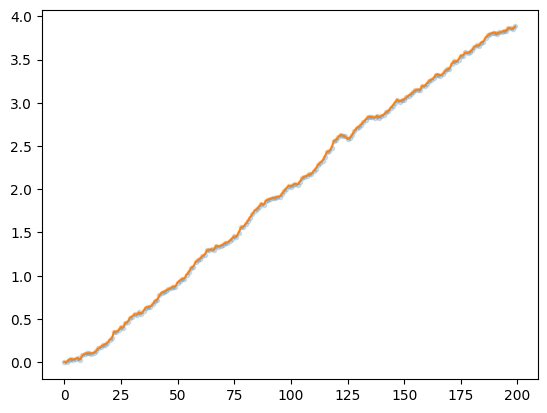

In [6]:

from numpy.random import randn
import numpy as np
from matplotlib.pyplot import subplots, show
# Initial position
x_now = 0

# Speed 
v = 0.2

# Number of steps and time-step interval 
# Nsteps = 200
Nsteps = 200
dt = 0.1

# Process and sensor noise standard deviations
std_W = 0.2 * dt
std_V = 0.1 

# Process and measurement noise variances
var_W = std_W ** 2
var_V = std_V ** 2

# Simulate robot's motion with additive process noise
x = np.zeros(Nsteps)
z = np.zeros(Nsteps)
for n in range(1,Nsteps):
    # update simulated robot position
    x[n] = x[n - 1] + v * dt + randn(1) * std_W
    # simulate measured range with additive sensor noise
    z[n] = x[n] + randn(1) * std_V


# Start with a poor initial estimate of robot's position 
mean_X_posterior = 10
var_X_posterior = 10 ** 2

# Kalman filter
for n  in range(1,Nsteps):
    # Calculate mean and variance of prior estimate for position
    # (using motion model)
    mean_X_prior = mean_X_posterior + v * dt
    var_X_prior = var_X_posterior + var_W

    # ML estimate of position from measurement (using sensor model)
    x_infer = z[n]

    # Calculate Kalman gain
    K = var_X_prior / (var_V + var_X_prior)

    # Calculate mean and variance of posterior estimate for position 
    mean_X_posterior = mean_X_prior + K * ( x_infer - mean_X_prior)
    var_X_posterior = (1 - K) * var_X_posterior




fig,ax = subplots(1)
ax.plot(x,'.',alpha=0.2)
ax.plot(x,)



In [7]:
# def g(x_p,u_p,t):
#     return x_p + u_p*t

# def h(x):
#     return 0.3/(0.1 + x)

# def h_inverse(z, xmin,xmax):
#     def f(x,z):
#         return abs(h(x) - z) **2
#     xest = brute(f,((xmin,xmax)),), (z,))[0]
#     return xest

# print(invert_h(z(5),0,10))


/var/folders/8v/2l8mtcxj4sjf0ld4nx91607h0000gn/T/ipykernel_95328/683283132.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n] = x[n - 1] + v * dt + randn(1) * std_W
/var/folders/8v/2l8mtcxj4sjf0ld4nx91607h0000gn/T/ipykernel_95328/683283132.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[n] = x[n] + randn(1) * std_V


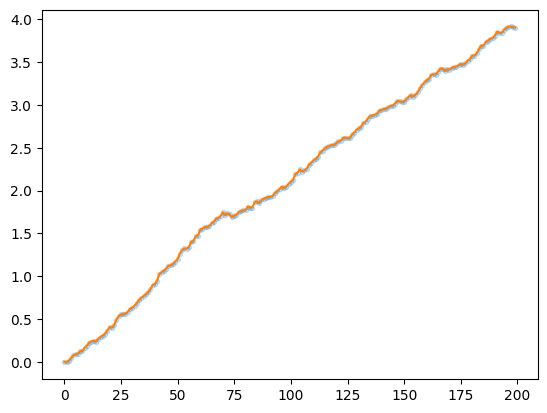

In [8]:
# Kalman filter demonstration program to estimate
# position of a robot moving at constant speed.
# M. P. Hayes UCECE 2015
from numpy.random import randn
import numpy as np
from matplotlib.pyplot import subplots, show

# Initial position
x = 0
# Speed 
v = 0.2

# Number of steps and time-step interval 
# Nsteps = 200
Nsteps = 200
dt = 0.1

# Process and sensor noise standard deviations
std_W = 0.2 * dt
std_V = 0.1 

# Process and measurement noise variances
var_W = std_W ** 2
var_V = std_V ** 2

# Simulate robot's motion with additive process noise
x = np.zeros(Nsteps)
z = np.zeros(Nsteps)
for n in range(1,Nsteps):
    # update simulated robot position
    x[n] = x[n - 1] + v * dt + randn(1) * std_W
    # simulate measured range with additive sensor noise
    z[n] = x[n] + randn(1) * std_V


# Start with a poor initial estimate of robot's position 
mean_X_posterior = 10
var_X_posterior = 10 ** 2

# Kalman filter
for n  in range(1,Nsteps):
    # Calculate mean and variance of prior estimate for position
    # (using motion model)
    mean_X_prior = mean_X_posterior + v * dt
    var_X_prior = var_X_posterior + var_W

    # ML estimate of position from measurement (using sensor model)
    x_infer = z[n]

    # Calculate Kalman gain
    K = var_X_prior / (var_V + var_X_prior)

    # Calculate mean and variance of posterior estimate for position 
    mean_X_posterior = mean_X_prior + K * ( x_infer - mean_X_prior)
    var_X_posterior = (1 - K) * var_X_posterior




fig,ax = subplots(1)
ax.plot(x,'.',alpha=0.2)
ax.plot(x,)



---


## OTher

In [9]:
import Model.IR_model as mm
ir3_x, ir3_v,ir3_fit,ir3_params= mm.remove_outlier(mm.ir4_model,distance,raw_ir4,3)


In [1]:
#!/usr/bin/env python3
"""Stats stuff"""

from matplotlib import RcParams
import numpy as np
import matplotlib.pyplot as plt


N = lambda x, mean, var: np.exp(-0.5 *((x-mean)/var)**2)  / (var * np.sqrt(2*np.pi))


def VarError_LookUpTable(x, error, xstep = 0.1):
    """
        x (长度): _description_
        error (拟合曲线的误差值): _description_
        xstep (分割精度): _description_. Defaults to 0.1.

    Returns:
        x 轴， 均值，方差值
    """
    curx = xstep
    curbar = np.array([])

    mean_x = np.array([])
    var_x = np.array([])
    xaxis = np.array([])

    for i in range(0, len(x)):
        
        if (x[i] < curx):
            
            curbar= np.append(curbar, error[i])
        else:
            # print(curbar)
            error_var = np.var(curbar)
            error_mean = np.mean(curbar)
            # print(f"variance: {error_var},  mean: {error_mean}")
            mean_x = np.append(mean_x, error_mean)
            var_x = np.append(var_x, error_var)
            xaxis = np.append(xaxis, x[i])
            curbar = np.array([])
            curx += xstep
    
    return xaxis, mean_x, var_x


In [2]:
x = distance 
fish1 = N(x, 1.5, 0.2)
plt.plot(x,fish1)

NameError: name 'distance' is not defined

In [3]:
# VarError(range,error,0.5)
ir3_mu, ir3_std,ir3_error = mm.Residual_and_Histogram(ir3_x,ir3_v,ir3_fit)
print(ir3_mu)

NameError: name 'mm' is not defined

In [4]:
def VarError(x, error, xstep = 0.1):
    curx = xstep
    curbar = np.array([])

    mean_x = np.array([])
    var_x = np.array([])
    xaxis = np.array([])

    for i in range(0, len(x)):
        
        if (x[i] < curx):
            
            curbar= np.append(curbar, error[i])
        else:
            # print(curbar)
            error_var = np.var(curbar)
            error_mean = np.mean(curbar)
            # print(f"variance: {error_var},  mean: {error_mean}")
            mean_x = np.append(mean_x, error_mean)
            var_x = np.append(var_x, error_var)
            xaxis = np.append(xaxis, x[i])
            curbar = np.array([])
            curx += xstep
    
    return xaxis, mean_x, var_x

[0.30103244 0.60159689 0.9000384  1.20080332 1.50080565 1.80171495
 2.10072715 2.40077599 2.70502573 3.00134785 3.30134543]


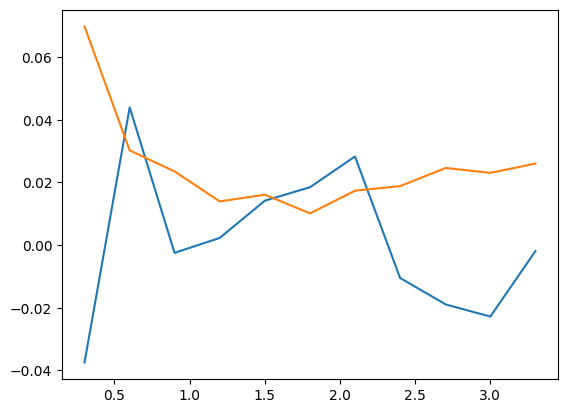

In [14]:
Xaxis_ir3, Mu_X_ir3, Var_X_ir3 = VarError(ir3_x,ir3_error,0.3)
# plt.figure()
plt.plot(Xaxis_ir3,Mu_X_ir3)
plt.plot(Xaxis_ir3,Var_X_ir3)
print(Xaxis_ir3)

# xaxi = distance 
# fish1 = N(distance,1.4,0.2603309)
# plt.plot(distance,fish1)
# print(mean_x)
# print(var_x)

2.7050257256267467
0.024616213644084638


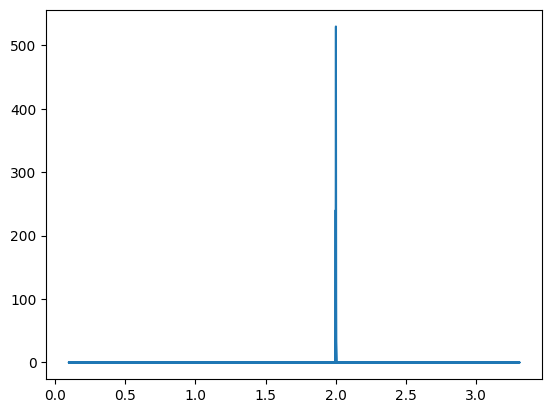

In [15]:
import numpy as np

def find_value_interval(value, intervals):
    """
    根据给定的值和区间，找到该值所在的区间索引。

    参数：
    - value：要查找区间的值。
    - intervals：包含区间的NumPy数组。假定区间是已排序的。

    返回：
    - interval_index：值所在的区间索引。如果值小于第一个区间下限，返回0。
      如果值大于最后一个区间上限，返回len(intervals) - 1。
    """
    if value < intervals[0]:
        return 0
    if value >= intervals[-1]:
        return len(intervals) - 1
    for i in range(len(intervals) - 1):
        if value >= intervals[i] and value < intervals[i + 1]:
            return i
    return -1  # 如果值不在任何区间内，则返回-1

# 区间
# 找到给定值所在的区间索引
interval_index = find_value_interval(2, Xaxis_ir3)

# 输出区间索引
# print(interval_index)
print(Xaxis_ir3[8])
print(Var_X_ir3[8])

x = distance 
fish1 = N(x, 2, Var_X_ir3[8]**2)
plt.plot(x,fish1)

## 找到值

[  0.82721749  19.34362126 -15.91513279]
[  0.97627199  30.98807107 -30.26798627]


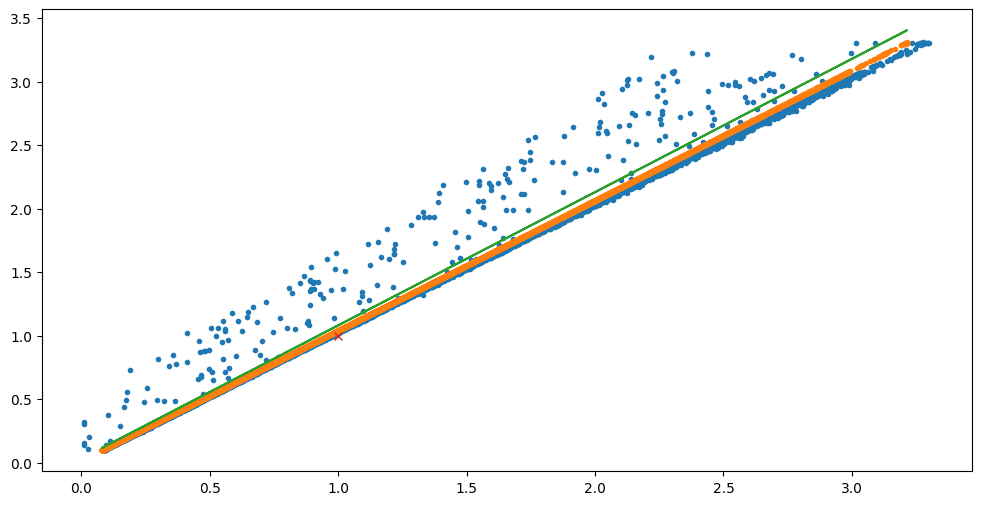

In [16]:
import scipy as sp
import Model.IR_model as mm
# ir3_x, ir3_v,ir3_fit,ir3_params= mm.remove_outlier(mm.ir3_model,distance,raw_ir3,3)
# 第一次过滤
sn1_x, sn1_v,sn1_fit,sn1_params= mm.remove_outlier(mm.sn1_model,distance,sonar1,0.7)
print(sn1_params)
# sn1_x, sn1_v,sn1_fit,sn1_params= mm.remove_outlier(mm.sn1_model,distance,sonar1,0.7)

def sn1_model(x,a,b,c):
    return a*(x+b) + c
# 调用 拟合曲线
filtered_params, cov = sp.optimize.curve_fit(sn1_model,sn1_x , sn1_fit)
filtered_fit = sn1_model(sn1_x, *filtered_params)
print(filtered_params)


sn1_k = filtered_params[0]
sn1_b = filtered_params[1]
sn1_c = filtered_params[2]

def H_INV_sn1(v):
    return (v-sn1_c)/sn1_k -sn1_b

# 原式子 dis vs voltage 
plt.figure(figsize=(12, 6))
# plt.plot(distance,sonar1,'.',alpha  = 0.2)
# plt.plot(sn1_x,sn1_v,'.')
# plt.plot(sn1_x,sn1_fit,'.')
# plt.plot(sn1_x, sn1_model(sn1_x, *filtered_params))

# 反式
# plt.plot(sn1_x,sn1_model(sn1_x,*sn1_params),'.')
plt.plot(sn1_v,sn1_x,'.')
plt.plot(sn1_fit,sn1_x,'.')
plt.plot(sn1_fit, H_INV_sn1(sn1_x))
 
plt.plot(1, 1,'x')

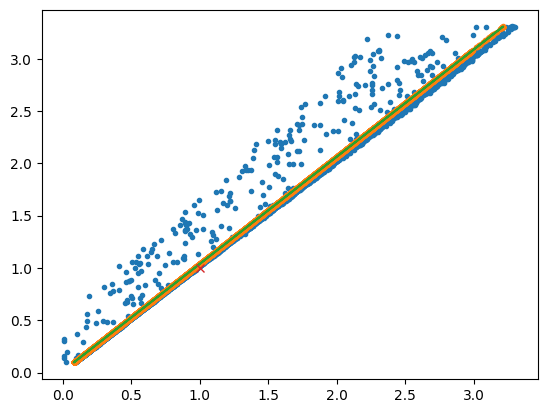

In [17]:
plt.plot(sn1_v,sn1_x,'.')
plt.plot(sn1_fit,sn1_x,'.')
plt.plot(sn1_fit, H_INV_sn1(sn1_fit))


# gus1 = 1;

try:
    plt.plot(1, 1,'x')
#     print(gus1)
#     print(h_inverse(gus1))
#     plt.plot(result,H_INV_sn1(result));
except:
    print("funk")
    pass

    #

Closest x value: 1.894736842105263
Corresponding h(x) value: 1.9563577530397893


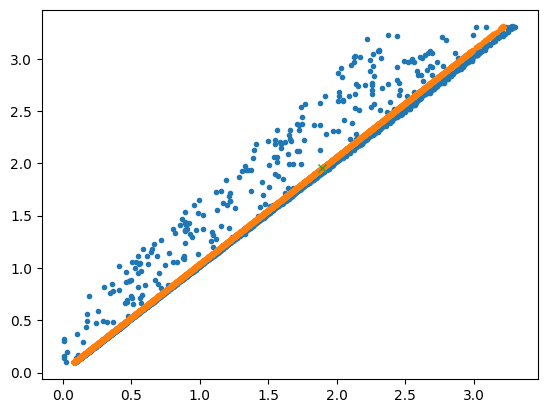

In [18]:
from scipy.optimize import brute



def h_inverse(z, xmin, xmax, step=0.01, tolerance=0.001):
    def error_function(x, z):
        return abs(H_INV_sn1(x) - z)

    result = brute(error_function, ((xmin, xmax),), args=(z,), full_output=True, finish=None)

    return result[0]  # Access the estimated x value directly

# 示例用法
z = 2  # Your target value
xmin = 0  # Minimum value in the range
xmax = 4  # Maximum value in the range

result = h_inverse(z, xmin, xmax)
print("Closest x value:", result)
print("Corresponding h(x) value:", H_INV_sn1(result))


plt.plot(sn1_v,sn1_x,'.')
plt.plot(sn1_fit,sn1_x,'.')
plt.plot(result, H_INV_sn1(result),'x')

# try:
# gus1 = 1;

# try:
#     plt.plot(1, 1,'x')
# #     print(gus1)
# #     print(h_inverse(gus1))
# #     plt.plot(result,H_INV_sn1(result));
# except:
#     print("funk")
#     pass





In [19]:
def findIndex2(needle, haystack):
    ind = 0
    for hay in haystack:
        if hay > needle:
            return ind
        ind += 1
    print("#2",end = "")
    return ind-1
    
findIndex2(2,sonar1)
print(sonar1[955])

2.013554334640504


In [20]:
rnge = (0,10)
for i in rnge:
    print(i)

0
10


## Example for M.P.Hayes